<a href="https://colab.research.google.com/github/Afzal786/Soft_Computing/blob/master/MIT2019072_SOC2020_Assignment2_GDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data is loaded using Pandas library  
d0 = pd.read_csv('micro.csv')

#Partitioning the dataset into data points and labels
label  = d0['y']
data = d0.drop("y",axis=1)

#obtained data-set after processing
print(d0)

           x1        x2  y
0    0.051267  0.699560  1
1   -0.092742  0.684940  1
2   -0.213710  0.692250  1
3   -0.375000  0.502190  1
4   -0.513250  0.465640  1
..        ...       ... ..
113 -0.720620  0.538740  0
114 -0.593890  0.494880  0
115 -0.484450  0.999270  0
116 -0.006336  0.999270  0
117  0.632650 -0.030612  0

[118 rows x 3 columns]


In [0]:
from sklearn.model_selection import train_test_split
def gaussian_discriminant_analysis(y,x):
    
    #data-set splitting into training and testing data
    #training data-set = 70%
    #testing data-set = 30%
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    #calculating phi a for p(x/y=1)
    phi=len(x_train[y_train==1])/len(x_train)
    
    #calculate the mean vector for the two cases
    #y==0 and y==1
    mean0=np.mean(x_train[y_train==0],0)
    mean1=np.mean(x_train[y_train==1],0)
    
    #calculate the difference between x and mean for the two cases
    #concatenate x for two cases 
    dif=pd.concat([x_train[y_train==0]-mean0,x_train[y_train==1]-mean1])
    
    temp=list(dif.columns)
    cov=[]

    #calculate the covariance matrix
    for i in range(len(dif.columns)):
        for j in range(len(dif.columns)):
            cov.append(( np.mat(dif[temp[i]])*np.mat(dif[temp[j]]).T).item()/len(temp))

    #print(len(cov))
    cov=np.mat(cov).reshape(2,2)
    
    

    p0=[]
    p1=[]
    
    #covariance matrix and phi
    #we use bayesian conditional probability formula to calculate the probability of y==0 and y==1 for each x and we use the larger probability of the two to predict y
    
    for k in range(len(x_test)):
        
        probability0=phi/(np.linalg.det(2*np.pi*cov)**(0.5)) *np.exp(-0.5*(np.mat(x_test.iloc[k]-mean0))*cov.I*(np.mat(x_test.iloc[k]-mean0)).T)
        
        
        probability1=phi/(np.linalg.det(2*np.pi*cov)**(0.5))*np.exp(-0.5*(np.mat(x_test.iloc[k]-mean1))*cov.I*(np.mat(x_test.iloc[k]-mean1)).T)
        
        
        p0.append(probability0.item())
        p1.append(probability1.item())
    
    #we use numpy sign numpy sign treats positive number as 1 it treats zero as 0
    #however, it treats negative number as -1 we use a map function to convert -1 to 0
    
    predict=np.sign(np.subtract(p1,p0))
    predict=list(map(lambda x: 0 if x<0 else int(x),predict))
    
    #PLOTTING the actual and predicted data using seaborn
    import seaborn as sn
    print("Plot of Predicted labels")
    data1 = np.vstack((x_test.T,predict)).T
    df1 = pd.DataFrame(data=data1, columns=("1st_principal", "2nd_principal", "predict"))
    #print(df1)
    sn.FacetGrid(df1, hue="predict", size=5).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
    plt.show()

    print("Plot of Actual labels")

    data2 = np.vstack((x_test.T,y_test)).T
    df2 = pd.DataFrame(data=data2, columns=("1st_principal", "2nd_principal", "y_test"))
    sn.FacetGrid(df2, hue="y_test", size=5).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
    plt.show()

    #test Accuracy obtained after the classification is calculated as 
    print('test accuracy: {}%'.format(len(y_test[predict==y_test])/len(y_test)*100))
    
    return

# **Raw data Submitted to GDA**

Plot of Predicted labels


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


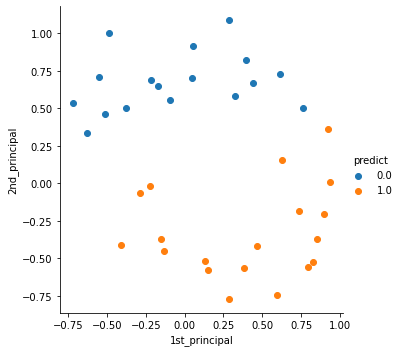

Plot of Actual labels


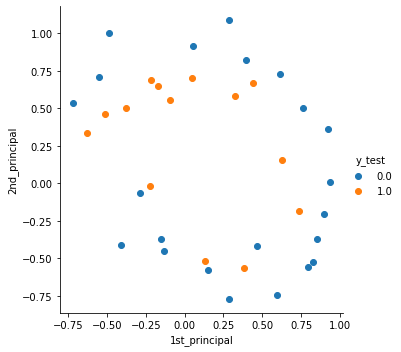

test accuracy: 36.11111111111111%


In [0]:
#print(data)
gaussian_discriminant_analysis(label,data)

# **Box- Muller Transformation for the data**

In [0]:
def generate_normal(x1,x2):
  z1 = np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*x2)
  z2 = np.sqrt(-2*np.log(x1))*np.sin(2*np.pi*x2)
  return z1,z2

data_new = np.zeros(len(data['x1'])*2).reshape(len(data['x1']),2)

[data_new[:,0],data_new[:,1]] = generate_normal(data['x1'],data['x2'])


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


# **After the Data is normally distributed passing it to GDA**

Plot of Predicted labels


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


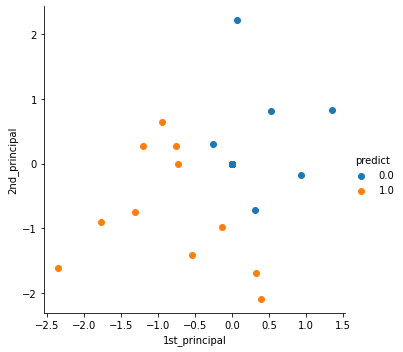

Plot of Actual labels


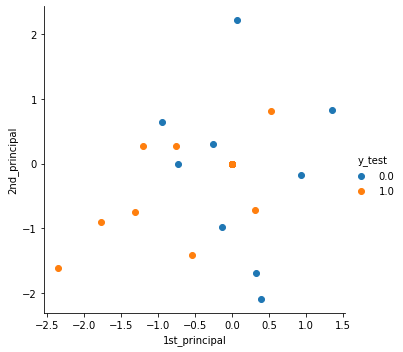

test accuracy: 47.22222222222222%


In [0]:
data_new = np.nan_to_num(data_new)
new_df = pd.DataFrame(data=data_new, columns=("x1", "x2"))
gaussian_discriminant_analysis(label,new_df)